In [1]:
import sys
sys.path.append('..')

In [2]:
from curry.features import Extractor
from curry.loader import Loader

In [3]:
ex = Extractor()

In [4]:
babel_vecs = ex.content_vecs(None, 'babelkw')

In [5]:
loader = Loader()

In [6]:
df, multi_grade_idx = loader.sublessons_w_content(filter_multi_grade=True)

In [7]:
df.shape

(11667, 7)

<AxesSubplot:>

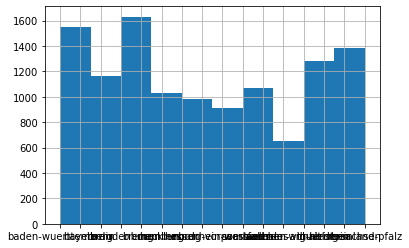

In [8]:
df.land.hist()

In [9]:
df.land.unique()

array(['baden-wuerttemberg', 'bayern', 'berlin', 'brandenburg', 'bremen',
       'hamburg', 'hessen', 'mecklenburg-vorpommern',
       'nordrhein-westfalen', 'saarland', 'sachsen', 'sachsen-anhalt',
       'schleswig-holstein', 'thueringen', 'niedersachsen',
       'rheinland-pfalz'], dtype=object)

In [26]:
parsed = dict()
with open('../../ansible/results/accuracies') as f:
    for l in f:
        label, acc = l.split('\t')
        parsed[label] = acc

In [48]:
import pandas as pd
features = ['babel_kw', 'kw', 'wiki_kw', 'st', 'tfidf']
models = ['xgbClassifier', 'xgbOrdinalClassifier', 'xgbCoarseGrainedClassifier']
is_filtered_table = pd.DataFrame(index=features, columns=models)
is_not_filtered_table = pd.DataFrame([], index=features)


In [57]:
for label in parsed:
    split = label.split('_')
    model = split[0].replace('xgbOrdinalClassifer', 'xgbOrdinalClassifier')
    is_filtered = (split[-2] == 'filtered')
    if is_filtered:
        feature = '_'.join(label.replace('multi_grade_filtered_', '').split('_')[1:-1])
        is_filtered_table.loc[feature, model] = float(parsed[label].strip())
    else:
        feature = '_'.join(label.split('_')[1:-1])
        is_not_filtered_table.loc[feature, model] = float(parsed[label].strip())
        
        
better_col_names = {
    'xgbClassifier': 'Simple Classification',
    'xgbOrdinalClassifier': 'Ordinal Classification',
    'xgbCoarseGrainedClassifier': 'Binned(3 Bins) Classification'
}

better_index_name = {
    'babel_kw': 'Babelfy KWs',
    'kw': 'YAKE KWs',
    'wiki_kw': 'Wikifier KWs',
    'st': 'Sentence Transformer',
    'tfidf': 'TF-IDF'
}


def style(df):
    
    def intensity(val):
        color = 'red' if val == 0 else 'green'
        return 'color: %s' % color
    return df.rename(columns=better_col_names, index=better_index_name).style.highlight_max(color='red')

print("W/ Lessons assigned to grades more than 2 apart filtered out")
display(style(is_filtered_table))

print("W/out above filtering")
display(style(is_not_filtered_table))

W/ Lessons assigned to grades more than 2 apart filtered out


,Simple Classification,Ordinal Classification,Binned(3 Bins) Classification
Babelfy KWs,0.123890,0.119565,0.496260
YAKE KWs,0.121201,0.111851,0.477443
Wikifier KWs,0.126578,0.123422,0.479313
Sentence Transformer,0.135227,0.134058,0.504208
TF-IDF,0.127747,0.116994,0.505259


W/out above filtering


,Simple Classification,Ordinal Classification,Binned(3 Bins) Classification
Babelfy KWs,0.122139,0.111768,0.479643
YAKE KWs,0.142539,0.100626,0.467472
Wikifier KWs,0.129853,0.106368,0.454273
Sentence Transformer,0.122825,0.114854,0.492415
TF-IDF,0.123854,0.109454,0.491900


In [54]:
is_filtered_table.quantile(.33)

Series([], Name: 0.33, dtype: float64)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

In [ ]:
from sk

In [20]:
disc.fit_transform(np.array([1,2,3,4,]).reshape((-1, 1)))

array([[0.],
       [0.],
       [1.],
       [1.]])

In [3]:
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# create sample dataset
X, y = make_multilabel_classification(n_samples=3000, n_features=45, n_classes=20, n_labels=1,
                                      allow_unlabeled=False, random_state=42)

# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

# evaluate on test data
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))



/home/rsebastian/.anaconda3/envs/curry/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy on test data: 49.8%


In [4]:
X.shape

(3000, 45)

In [5]:
y.shape

(3000, 20)

In [6]:
y[1, :]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1]:
import sys
sys.path.append('..')

In [2]:
from curry.loader import Loader

In [3]:
loader = Loader()

In [6]:
df = loader.sublessons_w_content(True)

In [8]:
agged = df.groupby(['land', 'url']).klass.apply(lambda s: s.max()-s.min())

In [19]:
filtered_df = df[df[['land', 'url']].apply(tuple, axis=1).isin(agged[agged<=2].index)]

In [33]:
selected_ilocs = []
for idx in filtered_df.index:
    iloc = filtered_df.index.get_loc(idx)
    selected_ilocs.append(iloc)


In [20]:
filtered_df.shape[0] / df.shape[0]

0.7333504757006942

In [23]:
df.index[-1]

11689

In [29]:
from curry.features import Extractor

In [30]:
ex = Extractor()

In [31]:
X = ex.join(df.content, df.land, 'babel_kw')

In [35]:
X[selected_ilocs]

<8556x5129 sparse matrix of type '<class 'numpy.float64'>'
	with 333126 stored elements in Compressed Sparse Row format>

In [37]:
df.klass.astype('category').cat.codes.values[selected_ilocs]

array([0, 0, 0, ..., 6, 6, 6], dtype=int8)

In [28]:
len(selected_ilocs)

8556

In [2]:
from curry.babelfy import Babelfier

In [3]:
babelfier = Babelfier()

In [4]:
from curry.features import Extractor

In [5]:
extractor = Extractor(cleaner = 'tf')

In [6]:
cleaned = extractor.cleaned_content(None)

In [7]:
import pickle

In [8]:
with open('.babelfier_bab.cache', 'rb') as f:
    print(len(pickle.load(f)))

399


In [9]:
extractor.babelfy_kws(None)

babelfy:  55%|███████████████████████████████████████████████▍                                       | 6365/11667 [00:00<00:00, 63646.57it/s]

failed for
Der Physik-Nobelpreisträger Richard P.  FEYNMAN (1918 - 1988) versuchte in seinem Buch "Vom Wesen physikalischer Gesetze" (Piper-Verlag) einem breiten Publikum die Besonderheiten der quantenphysikalischen Objekte wie Photon und Elektron an der einfachen Versuchsanordnung "Doppelspalt" zu erklären.  Diesem Weg werden wir im weiteren folgen.  Darüber hinaus hat sich in der deutschsprachigen Didaktik in den letzten Jahren die Beschreibung von Wesenszügen von Quantenobjekten heraus kristallisiert (Prof.  Müller, Dr.  Kübelbeck: Die Wesenszüge der Quantenphysik, Aulis-Verlag) auch auf diese Wesenszüge werden wir kurz eingehen.  Doppelspaltversuch mit klassischen Teilchen (z. B.  Kugeln) Der Doppelspalt wird mit einer Schrotflinte sehr schlechter Bauart beschossen.  Die resultierende "Kugelintensität" in der Nachweisebene ergibt sich aus der Addition der Einzelintensitäten.  Einzelne klassische Teilchen gehen beim Doppelspaltexperiment entweder durch den linken oder den rechten Sp

babelfy:  96%|█████████████████████████████████████████████████████████████████████████████████████▎   | 11177/11667 [01:05<00:06, 72.00it/s]

failed for
Starke Wechselwirkung Die starke Wechselwirkung ist u. a.  für die Bindung der Quarks in Protonen und Neutronen, die Kraft zwischen Protonen und Neutronen im Atomkern (Kernkraft) und den radioaktiven α-Zerfall verantwortlich.  unten) besitzen.  Die Vermittlung der starken Wechselwirkung zwischen Teilchen mit einer Farbladung geschieht durch Emission und Absorption von Gluonen (engl.  glue: kleben), den Botenteilchen der starken Wechselwirkung.  Dabei ändert sich im allgemeinen die Farbladung der einzelnen Teilchen.  Die Vermittlung der starken Wechselwirkung zwischen Teilchen mit starker Ladung durch Emission und Absorption von Gluonen ist in der Animation in Abb.  2 am Beispiel der Wechselwirkung zwischen zwei Quarks dargestellt: Das rote Up-Quark emittiert ein Gluon mit den Farben rot und anti-grün und wird zum grünen Up-Quark.  Bei der Absorption dieses Gluons wird das grüne Up-Quark zum roten Up-Quark.  Insgesamt kommt es also zu einem Farbwechsel der beiden Up-Quarks.  

babelfy: 100%|████████████████████████████████████████████████████████████████████████████████████████| 11667/11667 [01:48<00:00, 107.70it/s]


<11667x5113 sparse matrix of type '<class 'numpy.int64'>'
	with 443520 stored elements in Compressed Sparse Row format>

In [10]:
with open('.babelfier.cache', 'rb') as f:
    print(pickle.load(f).shape)

(11667, 5113)


In [16]:
babelfier.bab(cleaned[0])

[{'start': 8,
  'end': 15,
  'text': 'Aufgaben',
  'isEntity': True,
  'tokenFragment': {'start': 2, 'end': 2},
  'charFragment': {'start': 8, 'end': 15},
  'babelSynsetID': 'bn:00018756n',
  'DBpediaURL': '',
  'BabelNetURL': 'http://babelnet.org/rdf/s00018756n',
  'score': 0.0,
  'coherenceScore': 0.0,
  'globalScore': 0.0,
  'source': 'MCS'},
 {'start': 21,
  'end': 26,
  'text': 'Dichte',
  'isEntity': True,
  'tokenFragment': {'start': 4, 'end': 4},
  'charFragment': {'start': 21, 'end': 26},
  'babelSynsetID': 'bn:00026259n',
  'DBpediaURL': 'http://dbpedia.org/resource/Density',
  'BabelNetURL': 'http://babelnet.org/rdf/s00026259n',
  'score': 0.7297297297297297,
  'coherenceScore': 0.5,
  'globalScore': 0.05934065934065934,
  'source': 'BABELFY'},
 {'start': 28,
  'end': 32,
  'text': 'lässt',
  'isEntity': True,
  'tokenFragment': {'start': 5, 'end': 5},
  'charFragment': {'start': 28, 'end': 32},
  'babelSynsetID': 'bn:00084198v',
  'DBpediaURL': '',
  'BabelNetURL': 'http://

In [ ]:
Out[7]

In [ ]:
wikifer.wikify(c.)

In [2]:
from curry.main import Runner

In [3]:
runner = Runner()

In [4]:
runner.run()

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [5]:
df = runner.loader.sublessons_w_content()

In [7]:
df.klass.astype('category')

0        5
1        5
2        5
3        5
4        6
        ..
11685    6
11686    6
11687    6
11688    6
11689    6
Name: klass, Length: 11667, dtype: category
Categories (9, int64): [5, 6, 7, 8, ..., 10, 11, 12, 13]

In [2]:
from curry.loader import Loader
from curry.clean import Cleaner
from curry.features import Extractor

In [3]:
loader = Loader()
extractor = Extractor('tf')

In [4]:
extractor.keywords(loader.sublessons_w_content().content)

<11667x7684 sparse matrix of type '<class 'numpy.int64'>'
	with 229090 stored elements in Compressed Sparse Row format>

In [5]:
extractor.land_one_hot(loader.sublessons_w_content().land)

<11667x16 sparse matrix of type '<class 'numpy.float64'>'
	with 11667 stored elements in Compressed Sparse Row format>

In [6]:
from scipy.sparse import hstack

In [7]:
hstack([Out[4], Out[5]])

<11667x7700 sparse matrix of type '<class 'numpy.float64'>'
	with 240757 stored elements in COOrdinate format>

In [5]:
import xgboost as xgb

In [ ]:
extractor

In [7]:
cleaner.clean(df.content.iloc[0])

'Bei den Aufgaben zur Dichte lässt sich das Volumen mancher (sehr einfacher) Körper rechnerisch ermitteln.  Im Folgenden sind die Formeln für einige wichtige Umfangs-, Flächen- und Volumenberechnungen angegeben'

In [6]:
import pandas as pd
import pickle

In [7]:
lessons = pd.read_csv('../data/lessons.csv', index_col=0)

In [8]:
detail_pages = pd.read_csv('../data/detail_pages.csv', index_col=0)

In [9]:
sublessons = pd.merge(
        lessons, 
        detail_pages, 
        left_on='url', right_on='lesson_url').drop(columns='lesson_url')

In [12]:
sublessons.klass.value_counts().shape

(9,)

In [13]:
sublessons.head(2)

,land,klass,name,url,lessons_cat,grundwissen_url
0,baden-wuerttemberg,5,"Masse, Volumen und Dichte",/mechanik/masse-volumen-und-dichte,mechanik,/mechanik/masse-volumen-und-dichte/grundwissen...
1,baden-wuerttemberg,5,"Masse, Volumen und Dichte",/mechanik/masse-volumen-und-dichte,mechanik,/mechanik/masse-volumen-und-dichte/grundwissen...


In [ ]:
from curry

In [28]:
import os

In [29]:
len(os.listdir('../data/grundwissen_pages/'))

556

In [24]:


def to_kws(content):
    ranked_kws = yake.KeywordExtractor(lan='de').extract_keywords(content)
    sorted_kws = sorted(ranked_kws, key=lambda x: x[1], reverse=True)
    return [kw for (kw, _) in sorted_kws]


In [27]:
sublessons.grundwissen_url.apply(read_file)

0        <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
1        <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
2        <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
3        <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
4        <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
                               ...                        
11685    <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
11686    <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
11687    <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
11688    <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
11689    <!DOCTYPE html>\n<html lang="de" dir="ltr">\n<...
Name: grundwissen_url, Length: 11690, dtype: object

In [ ]:
!ls ../data/grundwissen_pages/SLASHmechanikSLASHmasse-volumen-und-dicht

In [18]:
with open('../data/keywords.pkl', 'rb') as f:
    kw = pickle.load(f)

ValueError: unsupported pickle protocol: 5